# Part 1 : The Ideal Case

In [1]:
import numpy as np
#1.1

#rearrange a free-fall function without drag to solve for time
def t(x):
    result = np.sqrt(x/4.9)
    
    return result
    
#solve for time when the object has traveled 4000 meters
print(f'The time it would take a test mass to reach the bottom of a 4 km shaft assuming no drag is {t(4000)} seconds')

The time it would take a test mass to reach the bottom of a 4 km shaft assuming no drag is 28.57142857142857 seconds



$$ \frac{d^2y}{dt^2} = -g - α(\frac{dy}{dt})^γ $$




$$ v = \frac{dy}{dt} $$ $$ \frac{dv}{dt} = -g - α(v)^γ $$

Time of impact with the bottom of the shaft is 28.571428571428584 seconds


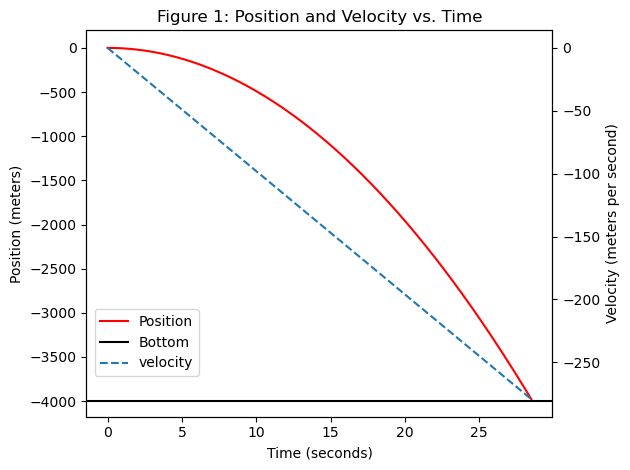

In [2]:
#1.3
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
alpha = 0 
g = 9.8

#define ode
def derivatives(t,s):
    y, v = s

    dydt = v
    dvdt = -g #alpha is 0 so the whole term is unneccessary (removes the need to define gamme)
    return [dydt, dvdt]
t0, tf =  0, 30 #define a window of time spanning half of a minute
t_eval = np.linspace(t0, tf, 200)
t_span = [t0, tf]
y0  = [0,0]

#define event for when position reaches the bottom
def event(t, z):
    return z[0] - (-4000)

#stop equation when it hits the bottom
event.terminal = True

soln = solve_ivp(derivatives, t_span, y0, t_eval = t_eval, events=event)
y, v = soln.y

#plot
figure, ax1 = plt.subplots()
ax1.plot(soln.t, y, label = 'Position', color = 'red')
ax2 = ax1.twinx()
ax2.plot(soln.t, v, label = 'velocity', linestyle ='--')
ax1.set_ylabel("Position (meters)")
ax1.set_xlabel('Time (seconds)')
ax2.set_ylabel("Velocity (meters per second)")
ax1.set_title("Figure 1: Position and Velocity vs. Time")
ax1.axhline(-4000, color = 'black', label = 'Bottom') # horizontal line at the bottom of the mine shaft

impact = soln.t_events[0][0]
print(f'Time of impact with the bottom of the shaft is {impact} seconds')

plt.tight_layout()
figure.legend(loc = (0.15, 0.2))

# Part 2: Including Drag and a variable g

Time of impact with the bottom of the shaft with varying gravity is 28.5583551125944 seconds


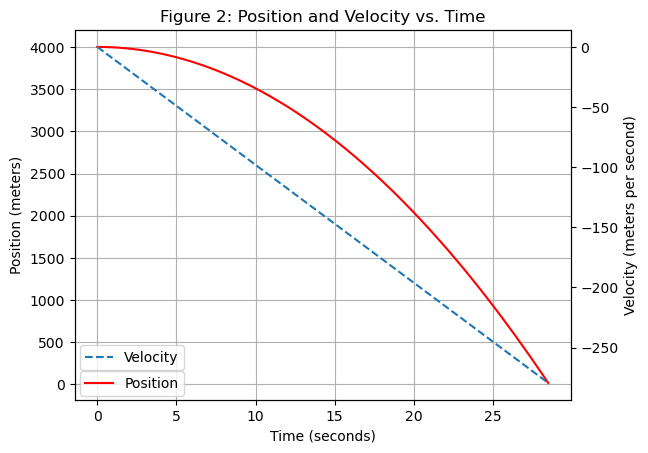

In [3]:
#2.1

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
g0 = 9.81
Re = 6378100 #Radius of the Earth


#same ode but now g varies with given equation
def derivatives(t,s):
    y, v = s
    
    r = Re + y
    grav = g0 * (r/Re)

    dydt = v
    dvdt = -grav #alpha is 0 so the whole term is unneccessary (removes the need to define gamme)
    return [dydt, dvdt]



t0, tf =  0, 30 #define a window of time spanning half of a minute
t_eval = np.linspace(t0, tf, 200)
t_span = [t0, tf]
y0  = 0,0

#define event for when position reaches the bottom
def event(t, z):
    return z[0] - (-4000)
    
event.terminal = True
event.direction = 0


soln = solve_ivp(derivatives, t_span, y0, t_eval = t_eval, events=event,rtol=1e-10, atol=1e-12)
y,v =soln.y


figure, ax = plt.subplots()
ax.plot(soln.t, y + 4000, color = 'red', label = 'Position') # the y position has 4000 added to it for plotting purposes
ax2 = ax.twinx()
ax2.plot(soln.t, v, linestyle = '--', label = 'Velocity')
ax.set_ylabel("Position (meters)")
ax.set_xlabel('Time (seconds)')
ax2.set_ylabel("Velocity (meters per second)")
ax.set_title("Figure 2: Position and Velocity vs. Time")
ax.grid(True)
ax.legend(loc=(0.01,0.01))
ax2.legend(loc=(0.01, 0.08))

impact = soln.t_events[0][0]

print(f'Time of impact with the bottom of the shaft with varying gravity is {impact} seconds')

Time of impact with the bottom of the shaft with drag force and varying gravity is 83.54182923504641 seconds


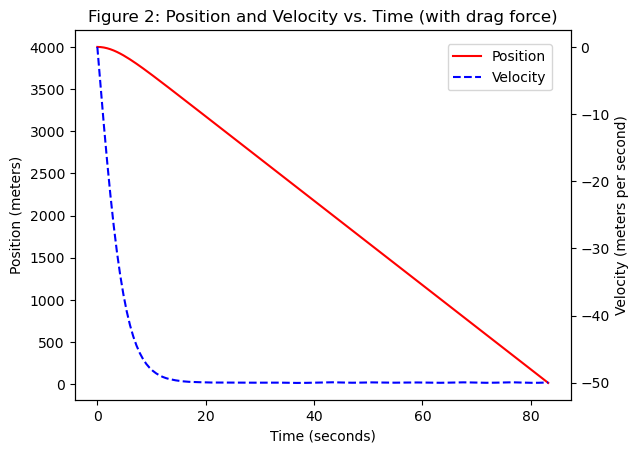

In [4]:
#2.3

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
g0 = 9.81
Re = 6378100 #Radius of the Earth



def derivatives(t,s):
    y, v = s
    gamma = 2

    #by assuming that the terminal velocity is 50 m/s and given gamma = 2 we can solve so that the sum of forces when v= 50 is 0
    alpha = 0.003924 #solved for assuming that grav it 9.81
    
    r = Re + y
    
    grav = g0 * (r/Re) 

    dydt = v
    dvdt = -(grav - alpha*v**gamma)
    
    return [dydt, dvdt]

t0, tf =  0, 120 #define a window of time spanning half of a minute
t_eval = np.linspace(t0, tf, 200)
t_span = [t0, tf]
y0  = 0,0

def event(t, z):
    return z[0] + 4000
event.terminal = True


soln = solve_ivp(derivatives, t_span, y0, t_eval = t_eval, events=event)
y,v =soln.y


figure, ax = plt.subplots()
ax.plot(soln.t, y + 4000, color = 'red', label = 'Position') # the y position has 4000 added to it for plotting purposes
ax2 = ax.twinx()
ax2.plot(soln.t, v, linestyle = '--', color = 'blue', label = 'Velocity')
ax.set_ylabel("Position (meters)")
ax.set_xlabel('Time (seconds)')
ax2.set_ylabel("Velocity (meters per second)")
ax.set_title("Figure 2: Position and Velocity vs. Time (with drag force)")

impact = soln.t_events[0][0]
figure.legend(loc = (0.7, 0.8))
print(f'Time of impact with the bottom of the shaft with drag force and varying gravity is {impact} seconds')

# Part 3: The Coriolis Force

Now that we are including the Coriolis Force we must include it into our equations as well as add equations for the position and velocity in the x direction.



$$ \frac{d^2y}{dt^2} = -(g - α(\frac{dy}{dt}))^γ + F_cy $$


$$ \frac{d^2y}{dt^2} = -(g - α(\frac{dy}{dt})^γ) −2Ωv_x $$


$$ v_y = \frac{dy}{dt} $$ 


$$ \frac{dv_y}{dt} = -(g - α(v_y)^γ) −2Ωv_x$$


$$ \frac{d^2x}{dt^2} = F_cx $$

$$ \frac{d^2x}{dt^2} = −2Ωv_y $$


$$ v_x = \frac{dx}{dt} $$ 

$$ \frac{dv_x}{dt} = 2Ωv_y $$


The time when the object impacts the wall is 21.90740028660885 seconds
Time of impact with the bottom of the shaft with drag force and varying gravity is 28.558375882561688 seconds


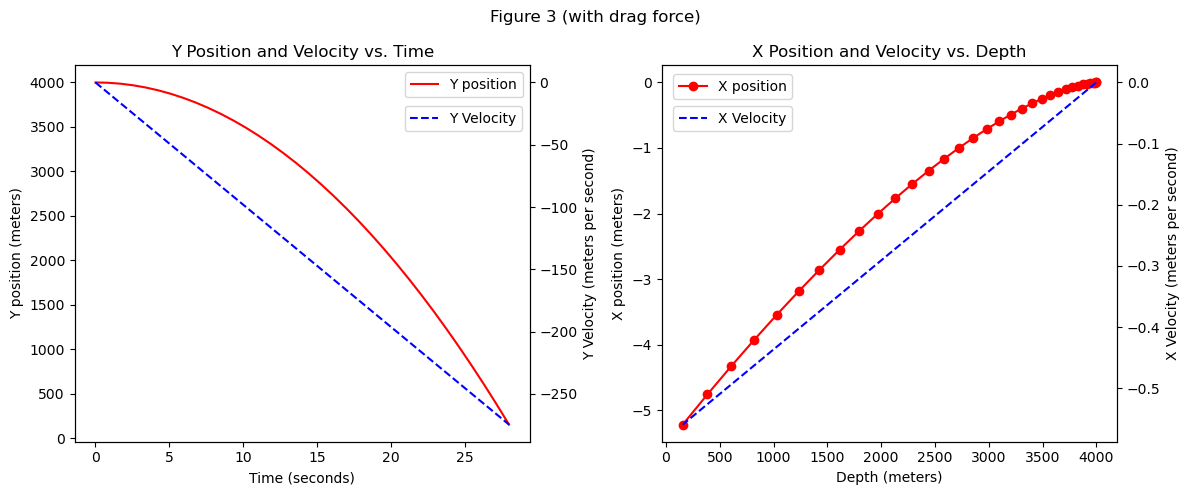

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

ohm = 7.272e-5

def derivatives(t, s):
    y, vy, x, vx = s
    gamma = 2
    

    alpha = 0 #as specified in directions
    
    r = Re + y
    
    grav = g0 * (r/Re) 

    dydt = vy
    dvydt = -(grav - alpha*vy**gamma) - 2*ohm*vx

    dxdt = vx
    dvxdt = (2 * ohm * vy) - (alpha*(vx))**(gamma)

    
    return [dydt, dvydt, dxdt, dvxdt]

t0, tf =  0, 84 #adjusted to go just to where impact is made
t_eval = np.linspace(t0, tf, 100)
t_span = [t0, tf]
y0, vy0 = 0, 0  # starts at surface
x0, vx0 = 0, 0  # no sideways motion
initial_state = [y0, vy0, x0, vx0]


def event1(t, z):
    return z[0] - (-4000)


event1.terminal = True

def event2(t, z):
    return z[2] + 2.5  # s[2] corresponds to x
   

soln = solve_ivp(derivatives, t_span, initial_state, t_eval=t_eval, events=[event1, event2])


figure, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].plot(soln.t, soln.y[0] + 4000, label = 'Y position', color = 'red')
ax2=ax[0].twinx()
ax2.plot(soln.t, soln.y[1], label = "Y Velocity", linestyle = '--', color = 'blue')

ax[1].plot(soln.y[0] +4000, soln.y[2], label = "X position", color = 'red', marker = 'o')
ax3 = ax[1].twinx()
ax3.plot(soln.y[0] +4000 , soln.y[3], label = "X Velocity", linestyle = '--', color = 'blue')


ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Y position (meters)")
ax[0].set_title("Y Position and Velocity vs. Time")
ax2.set_ylabel("Y Velocity (meters per second)")
ax[0].legend()
ax2.legend(loc=(0.725,0.825))


ax[1].set_xlabel("Depth (meters)")
ax[1].set_ylabel("X position (meters)")
ax[1].set_title("X Position and Velocity vs. Depth")
ax3.set_ylabel("X Velocity (meters per second)")
ax[1].legend(loc=(0.025,0.91))
ax3.legend(loc=(0.025,0.825))
figure.suptitle('Figure 3 (with drag force)')

final_x = soln.y[2, -1]
print(f"The time when the object impacts the wall is {soln.t_events[1][0]} seconds")
impact = soln.t_events[0][0]
print(f'Time of impact with the bottom of the shaft with drag force and varying gravity is {impact} seconds')
plt.tight_layout()

If the mine shaft is 5 meters wide radially the test object would bump into the wall before it reaches the bottom. This is because the object makes impact with the wall at 21.9 seconds and the object makes impact with the ground at 28.6 seconds.

Final lateral displacement: -23.085618043351715 meters


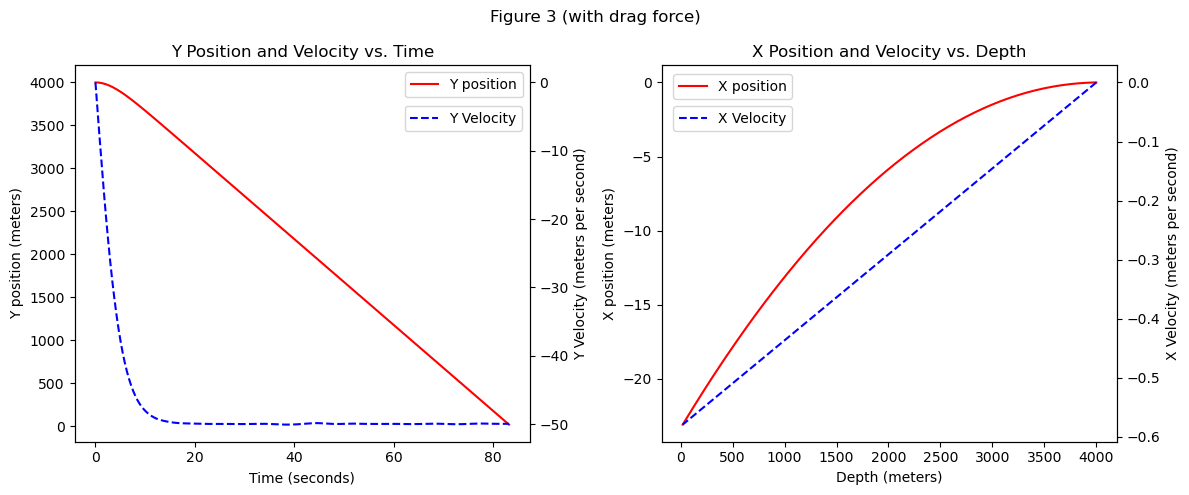

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

ohm = 7.272e-5

def derivatives(t, s):
    y, vy, x, vx = s
    gamma = 2
    

    alpha = 0.003924 #solved for assuming that grav it 9.81    
    
    r = Re + y
    
    grav = g0 * (r/Re) 

    dydt = vy
    dvydt = -(grav - alpha*vy**gamma) - 2*ohm*vx

    dxdt = vx
    dvxdt = (2 * ohm * vy) - (alpha*(vx))**(gamma)

    
    return [dydt, dvydt, dxdt, dvxdt]

t0, tf =  0, 84 #adjusted to go just to where impact is made
t_eval = np.linspace(t0, tf, 200)
t_span = [t0, tf]
y0, vy0 = 0, 0  # starts at surface
x0, vx0 = 0, 0  # no sideways motion
initial_state = [y0, vy0, x0, vx0]


def event1(t, z):
    return z[0] - (-4000)


event1.terminal = True

def event2(t, z):
    return z[2] + 2.5  # s[2] corresponds to x
   

soln = solve_ivp(derivatives, t_span, initial_state, t_eval=t_eval, events=[event1, event2])

figure, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].plot(soln.t, soln.y[0] + 4000, label = 'Y position', color = 'red')
ax2=ax[0].twinx()
ax2.plot(soln.t, soln.y[1], label = "Y Velocity", linestyle = '--', color = 'blue')

ax[1].plot(soln.y[0] +4000, soln.y[2], label = "X position", color = 'red')
ax3 = ax[1].twinx()
ax3.plot(soln.y[0] +4000 , soln.y[3], label = "X Velocity", linestyle = '--', color = 'blue')

ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Y position (meters)")
ax[0].set_title("Y Position and Velocity vs. Time")
ax2.set_ylabel("Y Velocity (meters per second)")
ax[0].legend()
ax2.legend(loc=(0.725,0.825))


ax[1].set_xlabel("Depth (meters)")
ax[1].set_ylabel("X position (meters)")
ax[1].set_title("X Position and Velocity vs. Depth")
ax3.set_ylabel("X Velocity (meters per second)")
ax[1].legend(loc=(0.025,0.91))
ax3.legend(loc=(0.025,0.825))
figure.suptitle('Figure 3 (with drag force)')

final_x = soln.y[2, -1]
print(f"Final lateral displacement: {final_x} meters")
plt.tight_layout()

# Part 4: An Infinetely Deep Mine

The object will reach the other side of the Earth at 2482.145634829555 seconds
The object will reach the center of the Earth at 1266.5753609114142 seconds with velocity -7910.067065442199 meters per second
The orbital time of an object aroud the Earth is 5069.371199675785 seconds


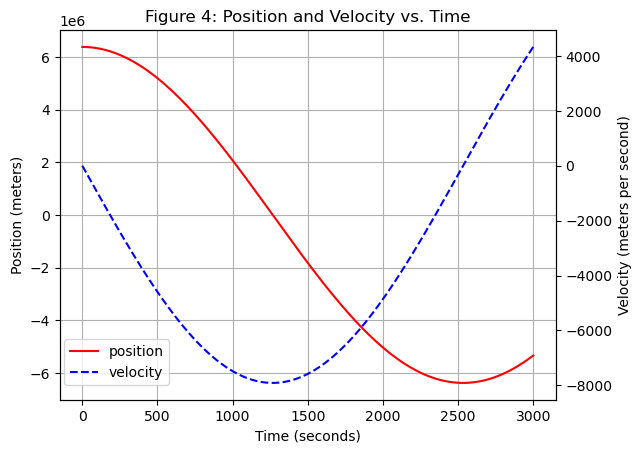

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Re = 6378100 #Radius of the Earth
g0 = 9.81

def derivatives(t, s):
    y, vy = s
    r = Re + y
    
    grav = g0 * (r/Re) 

    dydt = vy
    dvydt = -grav
    
    return [dydt, dvydt]


def event1(t, z):
    return z[0] - (-(2 * Re * .999))


def event2(t, z):
    return z[0] -  (-Re)  




t0, tf =  0,3000 #define a window of time large enough to go through the earth and come back
t_eval = np.linspace(t0, tf, 200)
t_span = [t0, tf]
y0  = 0
vy0 = 0
initial_conditions = y0, vy0

soln = solve_ivp(derivatives, t_span, initial_conditions, t_eval = t_eval, events=[event1, event2], rtol=1E-9, dense_output = True)
#print(soln)

t_center = soln.t_events[1][0]
y_center, v_center = soln.sol(t_center)

figure, ax1 = plt.subplots()
ax1.plot(soln.t, soln.y[0] + Re, label = 'position', color = 'red')
ax2 = ax1.twinx()
ax2.plot(soln.t, soln.y[1], label = 'velocity', linestyle ='--', color = 'blue')
ax1.set_ylabel("Position (meters)")
ax1.set_xlabel('Time (seconds)')
ax2.set_ylabel("Velocity (meters per second)")
ax1.set_title("Figure 4: Position and Velocity vs. Time")
ax1.grid(True)

figure.legend(loc = (0.1, 0.15))

print(f"The object will reach the other side of the Earth at {soln.t_events[0][0]} seconds")
print(f"The object will reach the center of the Earth at {soln.t_events[1][0]} seconds with velocity {v_center} meters per second")

earth_crossing = soln.t_events[1][0]

#constants for orbit time
G = 6.6743e-11
m_earth = 5.972e24
r_earth = 6378100
def orbit_time(m, r):
    return 2 * np.pi * r / (np.sqrt(G * m / r))

orbital_time = orbit_time(m_earth, r_earth)
print(f'The orbital time of an object aroud the Earth is {orbital_time} seconds')

The crossing time is about one fourth of the orbital period while the time for the object to fall all the way through the Earth is about half of the orbital period.

# Part 5: A non-uniform Earth

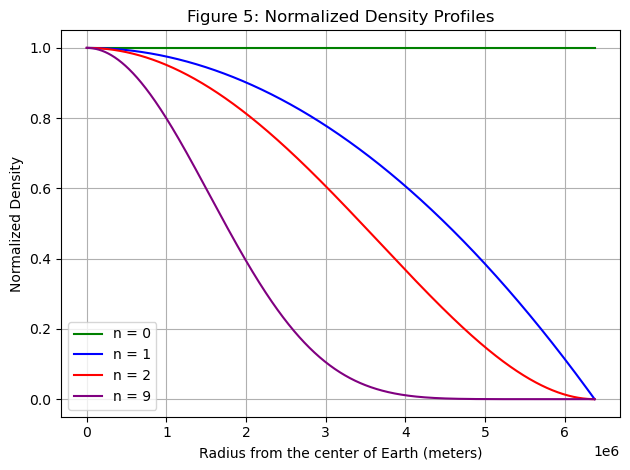

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


Me = 5.972e24
Re = 6378100 #Radius of the Earth
g0 = 9.81
pn = 1

r = np.linspace(0, Re, 1000)

n0 = (1 - (r**2/Re**2))**0
n1 = (1 - (r**2/Re**2))**1
n2 = (1 - (r**2/Re**2))**2
n9 = (1 - (r**2/Re**2))**9


figure, ax = plt.subplots()
ax.plot(r, n0, label="n = 0", color='green')
ax.plot(r, n1, label="n = 1", color='blue')
ax.plot(r, n2, label="n = 2", color='red')
ax.plot(r, n9, label="n = 9", color='purple')
ax.set_xlabel("Radius from the center of Earth (meters)")
ax.set_ylabel("Normalized Density")
ax.set_title("Figure 5: Normalized Density Profiles")
ax.legend()
ax.grid(True)
plt.tight_layout()


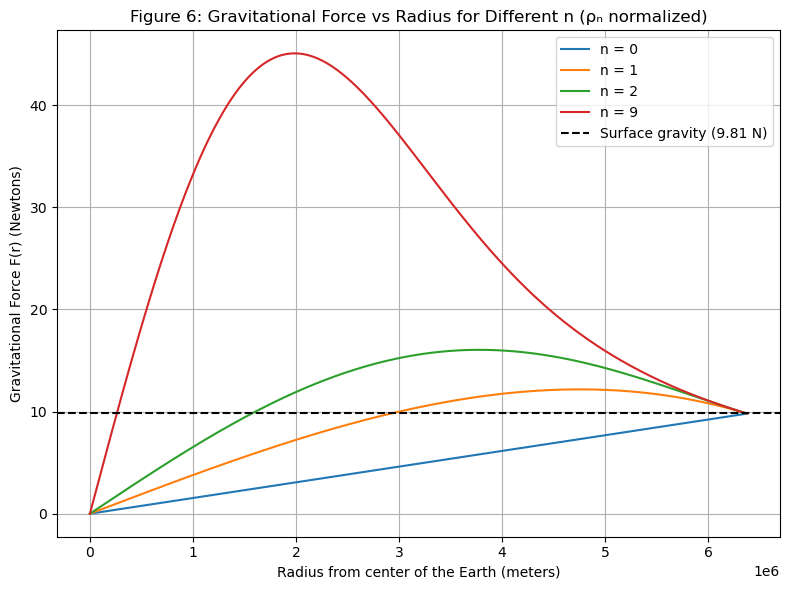

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#define constants
G = 6.6743e-11           
m = 1                    
Re = 6378100             
M_earth = 5.972e24       
r_vals = np.linspace(1, Re, 1000)  # avoid division by zero at r=0

# Density function with pn left as parameter that is solved for later
def density(r, n, pn):
    return pn * (1 - (r**2 / Re**2))**n

# find total mass for pn = 1
def mass_unscaled(n):
    integrand = lambda r: (1 - (r**2 / Re**2))**n * r**2
    integral, error = quad(integrand, 0, Re)
    return 4 * np.pi * integral  # Unscaled mass (no pn yet)

# find force profile for each n
def force_profile(n):
    M_uns = mass_unscaled(n)
    pn = M_earth / M_uns  # scale so that total mass is the Earth's mass

    # find enclosed mass for each radius
    M_r_vals = []
    for r in r_vals:
        integrand = lambda r0: (1 - (r0**2 / Re**2))**n * r0**2
        integral, _ = quad(integrand, 0, r)
        M_r = 4 * np.pi * pn * integral
        M_r_vals.append(M_r)

    M_r_vals = np.array(M_r_vals)
    F_vals = G * m * M_r_vals / r_vals**2
    return F_vals

# find force profiles for each n
F_n0 = force_profile(0)
F_n1 = force_profile(1)
F_n2 = force_profile(2)
F_n9 = force_profile(9)

figure, ax = plt.subplots(figsize = (8,6))
ax.plot(r_vals, F_n0, label="n = 0")
ax.plot(r_vals, F_n1, label="n = 1")
ax.plot(r_vals, F_n2, label="n = 2")
ax.plot(r_vals, F_n9, label="n = 9")
ax.axhline(y=9.81, color='k', linestyle='--', label="Surface gravity (9.81 N)")
ax.set_xlabel("Radius from center of the Earth (meters)")
ax.set_ylabel("Gravitational Force F(r) (Newtons)")
ax.set_title("Figure 6: Gravitational Force vs Radius for Different n (ρₙ normalized)")
ax.legend()
ax.grid(True)
plt.tight_layout()


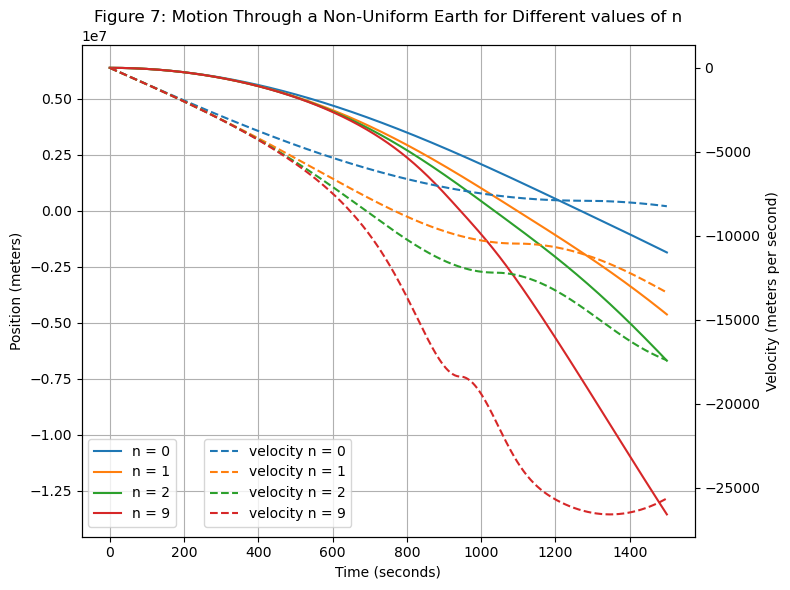

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d


#define constants
G = 6.6743e-11           
m = 1                    
Re = 6378100             
M_earth = 5.972e24       
r_vals = np.linspace(-3 * Re, Re, 1000)
r_vals = np.where(r_vals == 0, 1e-10, r_vals)  # avoid division by zero at r=0

# density function with pn left as parameter that is solved for later
def density(r, n, pn):
    return pn * (1 - (r**2 / Re**2))**n

# find total unscaled mass for pn = 1
def mass_unscaled(n):
    integrand = lambda r: (1 - (r**2 / Re**2))**n * r**2
    integral, error = quad(integrand, 0, Re)
    return 4 * np.pi * integral  # unscaled mass (no pn yet)

# find force profile for each n
def force_profile(n):
    M_uns = mass_unscaled(n)
    pn = M_earth / M_uns  # find pn that will scale each unscaled mass

    # find enclosed mass for each radius
    M_r_vals = []
    for r in r_vals:
        integrand = lambda r0: (1 - (r0**2 / Re**2))**n * r0**2
        integral, err = quad(integrand, 0, abs(r)) 
        M_r = 4 * np.pi * pn * integral #given equation for mass
        M_r_vals.append(M_r) #put back into the list

    M_r_vals = np.array(M_r_vals)
    F_vals = G * m * M_r_vals / r_vals**2 #create array of force using the mass that was found
    return F_vals


# find force profiles for each n
F_n0 = force_profile(0)
F_n1 = force_profile(1)
F_n2 = force_profile(2)
F_n9 = force_profile(9)


#define interpolated function of force profiles
F_func_n0 = interp1d(r_vals, F_n0, kind='linear', fill_value="extrapolate")
F_func_n1 = interp1d(r_vals, F_n1, kind='linear',fill_value="extrapolate")
F_func_n2 = interp1d(r_vals, F_n2, kind='linear',fill_value="extrapolate")
F_func_n9 = interp1d(r_vals, F_n9, kind='linear',fill_value="extrapolate")


def fall(t, s, force_func):
    y, v = s
    dydt = v
    dvdt = -(force_func(abs(y))) # no need to divide by mass because mass = 1
    return [dydt, dvdt]


y0 = [Re, 0]
t0 = 0
tf = 1500
t_eval = np.linspace(t0,tf, 500)
t_span = [t0, tf]

#solve for n = [0,1,2,9]
soln_n0 = solve_ivp(fall, t_span, y0, t_eval=t_eval, args=(F_func_n0,), rtol=1e-9)
soln_n1 = solve_ivp(fall, t_span, y0, t_eval=t_eval, args=(F_func_n1,), rtol=1e-9)
soln_n2 = solve_ivp(fall, t_span, y0, t_eval=t_eval, args=(F_func_n2,), rtol=1e-9)
soln_n9 = solve_ivp(fall, t_span, y0, t_eval=t_eval, args=(F_func_n9,), rtol=1e-9)


#create figure and plot each result
figure, ax = plt.subplots(figsize = (8,6))
ax.plot(soln_n0.t, soln_n0.y[0], label="n = 0")
ax.plot(soln_n1.t, soln_n1.y[0], label="n = 1")
ax.plot(soln_n2.t, soln_n2.y[0], label="n = 2")
ax.plot(soln_n9.t, soln_n9.y[0], label="n = 9")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Position (meters)")
ax.set_title("Figure 7a: Position vs Time for Different n (ρₙ Adjusted)")
ax.legend(loc = (0.01,0.02))
ax.grid(True)

#use twinx to get velocity on the same graph the same as in part 1
ax2 = ax.twinx()
ax2.plot(soln_n0.t, soln_n0.y[1], label="velocity n = 0", linestyle = '--')
ax2.plot(soln_n1.t, soln_n1.y[1], label="velocity n = 1", linestyle = '--')
ax2.plot(soln_n2.t, soln_n2.y[1], label="velocity n = 2", linestyle = '--')
ax2.plot(soln_n9.t, soln_n9.y[1], label="velocity n = 9", linestyle = '--')
ax2.set_ylabel("Velocity (meters per second)")
ax2.legend(loc = (0.2,0.02))
ax.set_title("Figure 7: Motion Through a Non-Uniform Earth for Different values of n")
plt.tight_layout()



In [11]:
#5.4
import numpy as np
from scipy.integrate import solve_ivp

def event(t, s, force_func):
    return s[0]  # y = 0 is the condition

event.terminal = True
event.direction = -1  # only trigger when approaching from positive side

soln_n0 = solve_ivp(fall, t_span, y0, args=(F_func_n0,), rtol=1e-9, events=event)
soln_n1 = solve_ivp(fall, t_span, y0, args=(F_func_n1,), rtol=1e-9, events=event)
soln_n2 = solve_ivp(fall, t_span, y0, args=(F_func_n2,), rtol=1e-9, events=event)
soln_n9 = solve_ivp(fall, t_span, y0, args=(F_func_n9,), rtol=1e-9, events=event)

print(f'In the case where n = 0, the object crosses the center of the Earth after {soln_n0.t_events[0][0]} seconds, as a speed of {abs(soln_n0.y_events[0][0][1])} meters per second')
print(f'In the case where n = 1, the object crosses the center of the Earth after {soln_n1.t_events[0][0]} seconds, as a speed of {abs(soln_n1.y_events[0][0][1])} meters per second')
print(f'In the case where n = 2, the object crosses the center of the Earth after {soln_n2.t_events[0][0]} seconds, as a speed of {abs(soln_n2.y_events[0][0][1])} meters per second')
print(f'In the case where n = 9, the object crosses the center of the Earth after {soln_n9.t_events[0][0]} seconds, as a speed of {abs(soln_n9.y_events[0][0][1])} meters per second')

In the case where n = 0, the object crosses the center of the Earth after 1267.3427980603667 seconds, as a speed of 7905.295024975206 meters per second
In the case where n = 1, the object crosses the center of the Earth after 1096.5180717518335 seconds, as a speed of 10457.693939250903 meters per second
In the case where n = 2, the object crosses the center of the Earth after 1035.076029891202 seconds, as a speed of 12182.85811483661 meters per second
In the case where n = 9, the object crosses the center of the Earth after 943.774598037075 seconds, as a speed of 18370.74121556456 meters per second


# Part 6

In [12]:
import numpy as np

# moon constants
G = 6.6743e-11  
R_moon = 1.737e6  
M_moon = 7.342e22 

# angular frequency for SHM using a uniform Moon
omega_moon = np.sqrt(G * M_moon / R_moon**3)

# time to fall to the center
T_half_moon = 0.5 * np.pi / omega_moon

print(f"Time to fall to the center of the Moon (uniform density): {T_half_moon} seconds")


Time to fall to the center of the Moon (uniform density): 1624.4619856403817 seconds


In [13]:
import numpy as np
from scipy.integrate import quad

# define constants
G = 6.6743e-11
R_earth = 6.3781e6     
M_earth = 5.972e24     
R_moon = 1.737e6    
M_moon = 7.342e22   

def density(R, M, n):
    integrand = lambda r: (1 - (r**2 / R**2))**n * r**2
    integral, _ = quad(integrand, 0, R)
    pn = M / (4 * np.pi * integral)
    return pn

# for n = 0 density is constant
pn_earth = density(R_earth, M_earth, 0)
pn_moon = density(R_moon, M_moon, 0)
density_ratio = pn_moon / pn_earth
time_ratio = T_half_moon/earth_crossing
print(f"Earth density: {pn_earth} kg/m³")
print(f"Moon density: {pn_moon} kg/m³")
print(f"Ratio of Moon density to Earth density: {density_ratio}")
print(f"Ratio of Moon time to Earth time: {time_ratio}")



Earth density: 5494.8674095512 kg/m³
Moon density: 3344.462382661104 kg/m³
Ratio of Moon density to Earth density: 0.6086520626226115
Ratio of Moon time to Earth time: 1.282562440241563


(6.3) In treating the mass of the moon and mass of the Earth as homogeneous we can see that the resulting motion is simple harmonic motion. This means that the time T for an object to pass through the center of a planet is proportional to an oscillation time.

$$
T= 2\pi \sqrt{\frac{3}{4\pi G \rho}}
$$
From this comparison to simple harmonic motion we can find the relationship between density and the time to pass through a planet are proportional as follows:
$$
t \propto \frac{1}{\sqrt{\rho}}
$$
